# Pymaceuticals Inc.
---

### Analysis

- As a whole, the resource datasets are likely to be reliable due to there being originally only one duplicate mouse ID and, in the group of four most successful drugs, only one outlier data point was found, relative to volume of the tumor (seen in the box plots).

- The five drugs that resulted in the smallest average tumor volume according to the study were: Capomulin, Ceftamin, Infubinol, Ramicane and Propriva. Capomulin and Ramicane were by far the best drugs in terms of mean tumor volume. Propriva, however, despite having a smaller mean tumor volume than Ceftamin and Infubinol, had the highest tumor volume variance, standard deviation and standard error of the mean compared to all other four drugs. This indicates that its results are more likely to show an inaccurate representation of true average tumor values. Therefore, the drugs with the best results in combating tumor development were Capomulin, Ceftamin, Infubinol and Ramicane. The corresponding values that led to this analysis are shown in the summary_stats_df data frame.

- According to tumor treatment studies(1), “since mouse dropout may reflect moribund outcomes due to drug toxicity or excessive tumor burden due to lack of efficacy, the remaining sample size at each time point” is measured. This indicates that drugs with more mice surviving to the last time point are likely to be more effective in reducing tumor growth. On the face of it, the bar plots show that Capomulin and Ramicane had a noticeably higher amount of time points measured, with Capomulin having 55% more time points measured than Propriva, the drug with the fewest time points measured. ((1) see References)

- Studies say that “there are significant differences in how male and female animals and cells experience disease and react to drugs, in part due to intrinsic hormonal and genetic differences.”(2) Pie charts show the number of males in this current study is 2% greater than the number of female mice, which indicates that the mouse population was nearly evenly distributed by sex. ((2) see References)

- As an example, the line plot shows the evolution of tumor volume over the period studied for a mouse treated with Capomulin. It can be seen that this drug reduced tumor volume by about 9% for this mouse.

- Scatter plots show a strong positive correlation (=0.84) between mouse weight and average tumor volume, ie, the heavier the mouse, the greater the probability of that mouse developing a tumor with greater volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(study_results,mouse_metadata,how="left")

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_IDs = data_df["Mouse ID"].unique()
mouse_number = len(mouse_IDs)
mouse_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_info = data_df.loc[data_df["Mouse ID"]=="g989",:]
duplicate_mice_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_df_clean = data_df[data_df["Mouse ID"]!="g989"]
data_df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_IDs_clean = data_df_clean["Mouse ID"].unique()
mouse_number_clean = len(mouse_IDs_clean)
mouse_number_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = data_df_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = data_df_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor = data_df_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev_tumor = data_df_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM_tumor = data_df_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor,
                        "Median Tumor Volume":median_tumor,
                        "Tumor Volume Variance":variance_tumor,
                        "Tumor Volume Std. Dev.":std_dev_tumor,
                        "Tumor Volume Std. Err.":SEM_tumor})

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats_agg_df = data_df_clean.groupby(["Drug Regimen"])\
                       .aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std','sem']})
summary_stats_agg_df.style

## Bar and Pie Charts

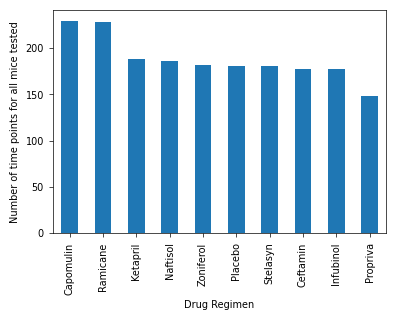

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested = pd.DataFrame(data_df_clean.groupby(["Drug Regimen"]).count()["Timepoint"])
mice_tested_sorted =  mice_tested.sort_values(by=["Timepoint"],ascending=False)

ax0 = mice_tested_sorted.plot.bar(xlabel="Drug Regimen",ylabel="Number of Mice Tested",rot=90,legend=False,
                                  figsize=(4.3, 2.9),fontsize=7,width=0.5)
ax0.set_xlabel("Drug Regimen",fontdict={'fontsize':7})
ax0.set_ylabel("Number of time points for all mice tested",fontdict={'fontsize':7})

ax0.tick_params("y", length=3, width=0.5)
ax0.tick_params("x", length=3, width=0.5)

ax0.spines.bottom.set_linewidth(0.5)
ax0.spines.left.set_linewidth(0.5)
ax0.spines.right.set_linewidth(0.5)
ax0.spines.top.set_linewidth(0.5)

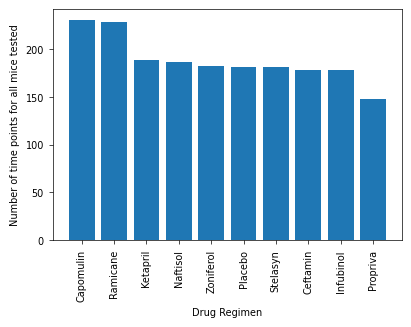

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_tested_plt = pd.DataFrame(data_df_clean.groupby(["Drug Regimen"]).count()["Timepoint"])
mice_tested_plt_sorted = mice_tested.sort_values("Timepoint",ascending=False)

fig1, ax1 = plt.subplots(figsize=(4.5, 3))

ax1.tick_params("y", length=3, width=0.5)
ax1.tick_params("x", length=3, width=0.5)

ax1.spines.bottom.set_linewidth(0.5)
ax1.spines.left.set_linewidth(0.5)
ax1.spines.right.set_linewidth(0.5)
ax1.spines.top.set_linewidth(0.5)

y_axis = mice_tested_plt_sorted["Timepoint"]
x_axis = mice_tested_plt_sorted.index

plt.bar(x_axis, y_axis, data=mice_tested_plt_sorted,color='tab:blue', alpha=1, align="center",width=0.8)

plt.xlabel("Drug Regimen", fontdict={"fontsize": 7})
plt.ylabel("Number of time points for all mice tested", fontdict={"fontsize": 7})
plt.xticks(fontsize=7,rotation = "vertical")
plt.yticks(fontsize=7,rotation = 0)

plt.show()

Text(0, 0.5, 'Sex')

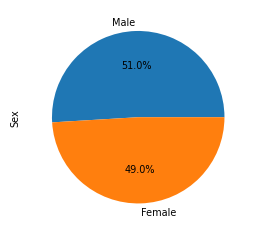

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Setting calculations for both pie charts
mice_gender_df = pd.DataFrame(data_df_clean.groupby(["Sex"]).count()["Mouse ID"])
mice_female_count = mice_gender_df.loc["Female", "Mouse ID"]
mice_male_count = mice_gender_df.loc["Male", "Mouse ID"]

mouse_total_count = mice_female_count + mice_male_count
mice_female_pct = ((mice_female_count) / (mouse_total_count))*100
mice_male_pct = ((mice_male_count) / (mouse_total_count))*100

genders_labels = ["Male","Female"]
genders_count = [mice_male_pct,mice_female_pct]
colors = ["tab:blue","tab:orange"]

# Generating pie chart with Pandas
gender_pandas_pie_df = pd.DataFrame([mice_male_pct,mice_female_pct,],index=genders_labels,columns=["Sex"])
ax2 = gender_pandas_pie_df.plot(kind='pie', y="Sex", figsize=(2.8, 2.8),autopct='%1.1f%%',legend=False,
                                fontsize=7,colors=colors, ylabel='')
ax2.set_ylabel("Sex",fontdict={'fontsize':7})

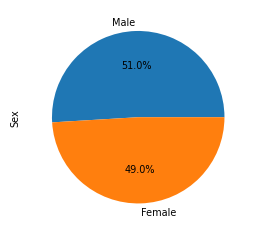

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Generating pie chart with pyplot
plt.figure(figsize=(2.8,2.8))

plt.pie(genders_count, labels=genders_labels, colors=colors,autopct="%1.1f%%", shadow=False, startangle=0,
        textprops={"fontsize":7})
plt.ylabel("Sex", fontdict={"fontsize": 7})

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_timepoint_df = pd.DataFrame(data_df_clean.groupby(["Mouse ID"]).max()["Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_original_df = pd.merge(mice_timepoint_df,data_df_clean,on="Mouse ID")
maximum_time_df = merge_original_df.rename(columns={"Timepoint_x": "Timepoint MAX","Timepoint_y":"Timepoint"})
max_time_df = maximum_time_df.sort_values(["Tumor Volume (mm3)"]).reset_index(drop=True)

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_promising = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
                                                 
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_promising:
    drug_promising_df = max_time_df.loc[(max_time_df["Drug Regimen"] == drug)]
    # add subset 
    max_time_vol_df = drug_promising_df.loc[(drug_promising_df["Timepoint"] == drug_promising_df["Timepoint MAX"])]
    max_volume = max_time_vol_df["Tumor Volume (mm3)"]
    max_volume_tumor = tumor_vol_data.append(max_volume)
    
# Above: looping through all the merged DataFrame to create a new DataFrame with only the promising drugs listed,
# then finding the maximum tumor volume after identifying the row where the timepoint had the maximum value for each
# mouse. Finally, appending the maximum tumor volume values to the list created for this purpose. 
    
    # Determine outliers using upper and lower bounds
    quartiles = max_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_tum_vol = max_volume.loc[(max_volume < lower_bound) | (max_volume > upper_bound)]
       
    print(f"{drug}'s potential outliers: {outlier_tum_vol}")    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 98    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


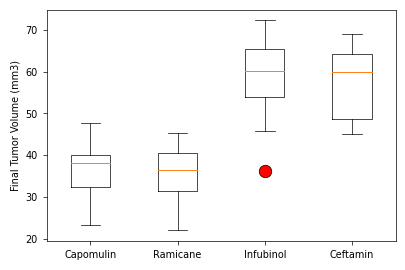

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='red', markersize=9, markeredgecolor='black',linestyle='none',
                  markeredgewidth=0.5)
boxprops = dict(linestyle='-', linewidth=0.5, color='black')
whiskerprops = dict(linestyle='-', linewidth=0.5, color='black')
medianprops = dict(linestyle='-', linewidth=0.7, color='tab:orange')
capprops = dict(linestyle='-', linewidth=0.5, color='black')

fig3, ax3 = plt.subplots(figsize=(4.5, 3))

ax3.tick_params("y", length=3, width=0.5)
ax3.tick_params("x", length=3, width=0.5)

ax3.spines.bottom.set_linewidth(0.5)
ax3.spines.left.set_linewidth(0.5)
ax3.spines.right.set_linewidth(0.5)
ax3.spines.top.set_linewidth(0.5)

ax3.boxplot(tumor_vol_data,flierprops=flierprops,boxprops=boxprops,whiskerprops=whiskerprops,medianprops=medianprops,
            capprops=capprops)
ax3.set_ylabel("Final Tumor Volume (mm3)",fontdict={'fontsize':7})

plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.xticks(fontsize=7,rotation = 0)
plt.yticks(fontsize=7,rotation = 0)

plt.show()

  ## Line and Scatter Plots

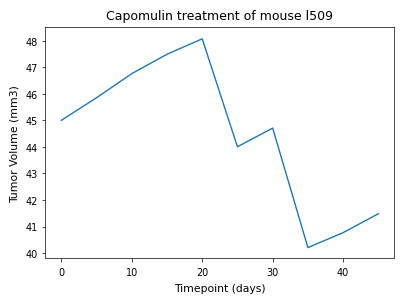

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_cap_df = data_df_clean.loc[(data_df_clean["Mouse ID"] == "l509") & \
                                 (data_df_clean["Drug Regimen"] == "Capomulin"), :]

fig4, ax4 = plt.subplots(figsize=(4.5, 3))

ax4.spines.bottom.set_linewidth(0.5)
ax4.spines.left.set_linewidth(0.5)
ax4.spines.right.set_linewidth(0.5)
ax4.spines.top.set_linewidth(0.5)

x_axis = mouse_cap_df["Timepoint"]
y_axis = mouse_cap_df["Tumor Volume (mm3)"]

plt.xlabel("Timepoint (days)",fontdict={"fontsize": 7.8})
plt.ylabel("Tumor Volume (mm3)",fontdict={"fontsize": 7.8})
plt.title("Capomulin treatment of mouse l509",fontdict={"fontsize": 9})
plt.xticks(fontsize=7,rotation = 0)
plt.yticks(range(40,49, 1))
plt.yticks(fontsize=7,rotation = 0)

ax4.tick_params("y", length=2, width=0.5)
ax4.tick_params("x", length=3, width=0.5)

plt.plot(x_axis, y_axis, linewidth=1.0)
plt.ylim(39.8, 48.5,1)
plt.show()

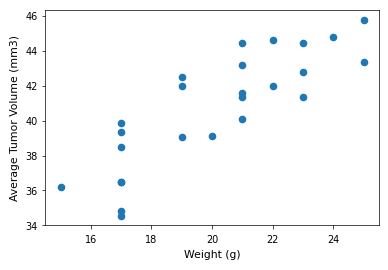

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_cap2_df = data_df_clean.loc[(data_df_clean["Drug Regimen"] == "Capomulin"), :]

mice_weight_mean_df = pd.DataFrame(mouse_cap2_df.groupby("Mouse ID").mean()["Weight (g)"])\
                      .sort_values("Weight (g)")
mice_tumvol_mean_df = pd.DataFrame(mouse_cap2_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"])\
                      .sort_values("Tumor Volume (mm3)")

merged_capweitumvol_df = pd.merge(mice_weight_mean_df,mice_tumvol_mean_df,on="Mouse ID")
merged_capweitumvol_df

fig5, ax5 = plt.subplots(figsize=(4.3, 2.8))

ax5.spines.bottom.set_linewidth(0.5)
ax5.spines.left.set_linewidth(0.5)
ax5.spines.right.set_linewidth(0.5)
ax5.spines.top.set_linewidth(0.5)

plt.xlabel("Weight (g)",fontdict={"fontsize": 7.8})
plt.ylabel("Average Tumor Volume (mm3)",fontdict={"fontsize": 7.8})

plt.xticks(fontsize=7,rotation = 0)
plt.yticks(range(34,48, 2))
plt.yticks(fontsize=7,rotation = 0)

ax5.tick_params("y", length=2, width=0.5)
ax5.tick_params("x", length=3, width=0.5)

x_axis = merged_capweitumvol_df["Weight (g)"]
y_axis = merged_capweitumvol_df["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o", s=20, facecolors="tab:blue", edgecolors="tab:blue", alpha=1)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


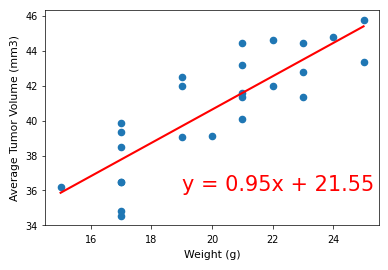

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_cap2_df = data_df_clean.loc[(data_df_clean["Drug Regimen"] == "Capomulin"), :]

mice_weight_mean_df = pd.DataFrame(mouse_cap2_df.groupby("Mouse ID").mean()["Weight (g)"])\
                      .sort_values("Weight (g)")
mice_tumvol_mean_df = pd.DataFrame(mouse_cap2_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"])\
                      .sort_values("Tumor Volume (mm3)")

merged_capweitumvol_df = pd.merge(mice_weight_mean_df,mice_tumvol_mean_df,on="Mouse ID")
merged_capweitumvol_df

fig6, ax6 = plt.subplots(figsize=(4.3, 2.8))

ax6.spines.bottom.set_linewidth(0.5)
ax6.spines.left.set_linewidth(0.5)
ax6.spines.right.set_linewidth(0.5)
ax6.spines.top.set_linewidth(0.5)

plt.xlabel("Weight (g)",fontdict={"fontsize": 7.8})
plt.ylabel("Average Tumor Volume (mm3)",fontdict={"fontsize": 7.8})

plt.xticks(fontsize=7,rotation = 0)
plt.yticks(range(34,48, 2))
plt.yticks(fontsize=7,rotation = 0)

ax6.tick_params("y", length=2, width=0.5)
ax6.tick_params("x", length=3, width=0.5)

x_axis = merged_capweitumvol_df["Weight (g)"]
y_axis = merged_capweitumvol_df["Tumor Volume (mm3)"]

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", s=20, facecolors="tab:blue", edgecolors="tab:blue", alpha=1)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=15,color="red")

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()